<class 'numpy.ndarray'> (94, 144, 3) uint16


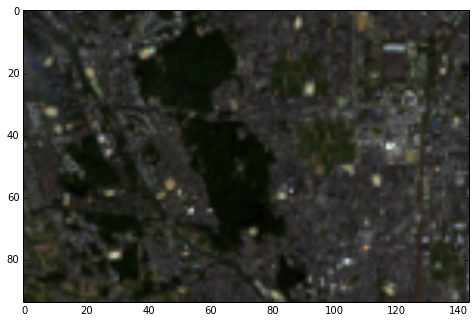

In [1]:
#!/user/bin/python3
# -*- coding: utf-8 -*- python version 3.4.3
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import gdal
from skimage import data, io
from skimage import img_as_ubyte
from PIL import Image
%matplotlib inline
os.chdir('/home/chieko/Documents/imageAnalysis')

# show location with landsat 8, band 4-3-2 only included, in the order
l8=io.imread('LANDSAT8.tif')
print(type(l8), l8.shape, l8.dtype)
#print(l8[1:5,1:5,1]) # see the int16 values

# unfortunately, simply converting to int8, doesn't work well for better/stretched image color
#l8rgb=img_as_ubyte(l8)
#print(type(l8rgb), l8rgb.shape, l8rgb.dtype)
#print(l8rgb[1:5,1:5,1]) # see the int16 values

# this works better: stretch values according to min/max int16 values
# ref: http://nbviewer.jupyter.org/gist/chryss/7638837
m,n,k=l8.shape
imgdata = np.zeros([m,n,k], np.uint8)
for idx, color in enumerate([l8[...,0],l8[...,1],l8[...,2]]):
    min = color.min()
    max = color.max()
    data = np.ma.masked_greater_equal(color, max)
    imgdata[:, :, idx] = np.multiply(255 / (max - min), data - min).astype(np.uint8)

# Plot in natural color
plt.figure()
plt.figure(figsize = (8,6))
plt.imshow(imgdata)

In [2]:
# import/read ASTER
f=io.imread('NASA_ASTERGED_AG100_003.tif')

# keep info on m/row, n/col, and k/RGB layer(3)
print(f.shape)
m,n,k=f.shape

# bands (k) : List (17 elements) - block comment shortcut cmd|ctrl)-/
# 0: "emissivity_band10", signed int16, EPSG:4326, 360000x139000 px
# 1: "emissivity_band11", signed int16, EPSG:4326, 360000x139000 px
# 2: "emissivity_band12", signed int16, EPSG:4326, 360000x139000 px
# 3: "emissivity_band13", signed int16, EPSG:4326, 360000x139000 px
# 4: "emissivity_band14", signed int16, EPSG:4326, 360000x139000 px
# 5: "emissivity_sdev_band10", signed int16, EPSG:4326, 360000x139000 px
# 6: "emissivity_sdev_band11", signed int16, EPSG:4326, 360000x139000 px
# 7: "emissivity_sdev_band12", signed int16, EPSG:4326, 360000x139000 px
# 8: "emissivity_sdev_band13", signed int16, EPSG:4326, 360000x139000 px
# 9: "emissivity_sdev_band14", signed int16, EPSG:4326, 360000x139000 px
# excluded # 10: "temperature", signed int32, EPSG:4326, 360000x139000 px
# excluded # 11: "temperature_sdev", signed int16, EPSG:4326, 360000x139000 px
# 12: "ndvi", signed int16, EPSG:4326, 360000x139000 px
# 13: "ndvi_sdev", signed int16, EPSG:4326, 360000x139000 px
# 14: "elevation", signed int16, EPSG:4326, 360000x139000 px
# excluded # 15: "land_water_map", signed int16, EPSG:4326, 360000x139000 px


(29, 54, 14)


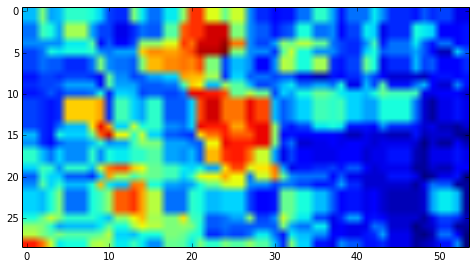

In [3]:
# check NDVI layer
plt.figure()
plt.figure(figsize = (8,7))
plt.imshow(f[...,10])
# plt.colorbar()

Minimum elevation value is:  11
Maximum elevation value is:  106


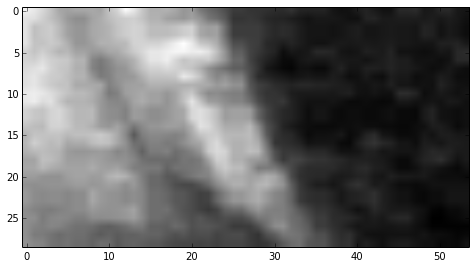

In [4]:
# check ASTER elevation
print("Minimum elevation value is: ", f[:,:,12].min())
print("Maximum elevation value is: ", f[:,:,12].max())
plt.figure()
plt.figure(figsize = (8,7))
plt.imshow(f[:,:,12], cmap='gray')